In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from collections import Counter


In [3]:
df = pd.read_pickle('hw3_p3.pkl')
df.keys()
X = df['x_train']
X_meaned = X - np.mean(X, axis=0)

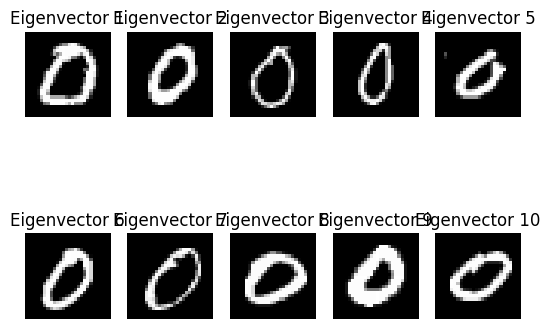

In [10]:

# Reshape and visualize the top 10 eigenvectors as images
for i in range(10):
    X_reshaped = X[i].reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(X_reshaped, cmap='gray')
    plt.title(f'Eigenvector {i+1}')
    plt.axis('off')

plt.show()


PCA Step
1. Center the data point
2. Compute for getting covariance matrix
3. Get eigenvalue and eigenvector
4. Sort eigenvectors by eigenvalues
5. Take top n eigenvectors

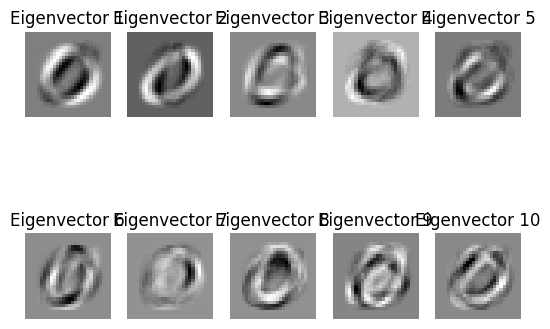

In [4]:

# Center the data
def PCA(X, n):
  X_centered = X - np.mean(X, axis=0)
  cov = np.dot(X_meaned.transpose(), X_meaned)/X.shape[0]
  cov = X_meaned.T @ X_meaned
  cov = cov / X.shape[0]

  eigen_val, eigen_vec = np.linalg.eigh(cov)

  sorted_index = np.argsort(eigen_val)[::-1]
  eigen_vec = eigen_vec[:, sorted_index]

  # take top n eigenvectors
  top = eigen_vec[:, :n]
  return top

eigen_vec = PCA(X, 10)


# Reshape and visualize the top 10 eigenvectors as images
for i in range(10):
    eigenvector_image = eigen_vec[:, i].reshape(28, 28)
    plt.subplot(2, 5, i+1)
    plt.imshow(eigenvector_image, cmap='gray')
    plt.title(f'Eigenvector {i+1}')
    plt.axis('off')

plt.show()


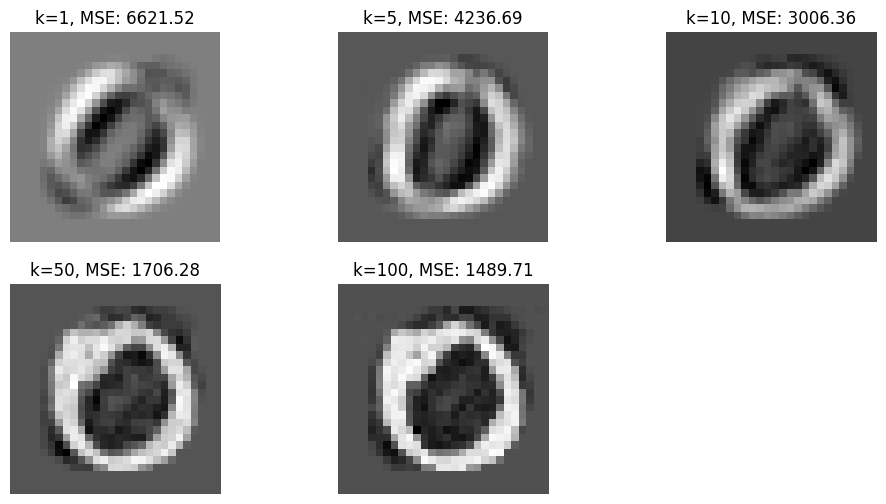

In [5]:
k_values = [1, 5, 10, 50, 100]

# Plot and report the results
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    plt.subplot(2, 3, i + 1)
    img = X[50]
    eigen_vec = PCA(X, k)
    img_centered = img - np.mean(img, axis=0)
    img_weights = np.dot(img_centered, eigen_vec)
    reconstruction = np.mean(img, axis=0) + np.dot(img_weights, eigen_vec.T)
    plt.imshow(reconstruction.reshape(28, 28), cmap='gray')
    plt.title(f'k={k}, MSE: {np.mean((img - reconstruction) ** 2):.2f}')
    plt.axis('off')

plt.show()